In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

PLOT_DIR = "plots"
DATA_FILE = "data/data.csv"

if not os.path.exists(PLOT_DIR):
    os.mkdir(PLOT_DIR)

df = pd.read_csv(DATA_FILE)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/no_pay_haystack.csv'

In [2]:
df["power"] = df.p_value < .05

In [3]:
gb = df[df.n_users == 2500].groupby(["n_treatments", "needle", "strategy"])
gb[["pr_best_arm", "power"]].count()

pr_best_arm  power
n_treatments needle        strategy                    
30           10c_PieceRate adaptive         1000   1000
                           random           1000   1000
             4c_PieceRate  adaptive          999    999
                           random           1000   1000
40           10c_PieceRate adaptive         1000   1000
                           random           1000   1000
             4c_PieceRate  adaptive         1000   1000
                           random           1000   1000
50           10c_PieceRate adaptive          999    999
                           random           1000   1000
             4c_PieceRate  adaptive          999    999
                           random           1000   1000

In [4]:
gb[["pr_best_arm", "power"]].mean()

pr_best_arm     power
n_treatments needle        strategy                       
30           10c_PieceRate adaptive     0.873000  0.739000
                           random       0.814000  0.242000
             4c_PieceRate  adaptive     0.717718  0.429429
                           random       0.638000  0.145000
40           10c_PieceRate adaptive     0.793000  0.614000
                           random       0.670000  0.156000
             4c_PieceRate  adaptive     0.571000  0.273000
                           random       0.498000  0.135000
50           10c_PieceRate adaptive     0.721722  0.483483
                           random       0.540000  0.128000
             4c_PieceRate  adaptive     0.485485  0.241241
                           random       0.383000  0.091000

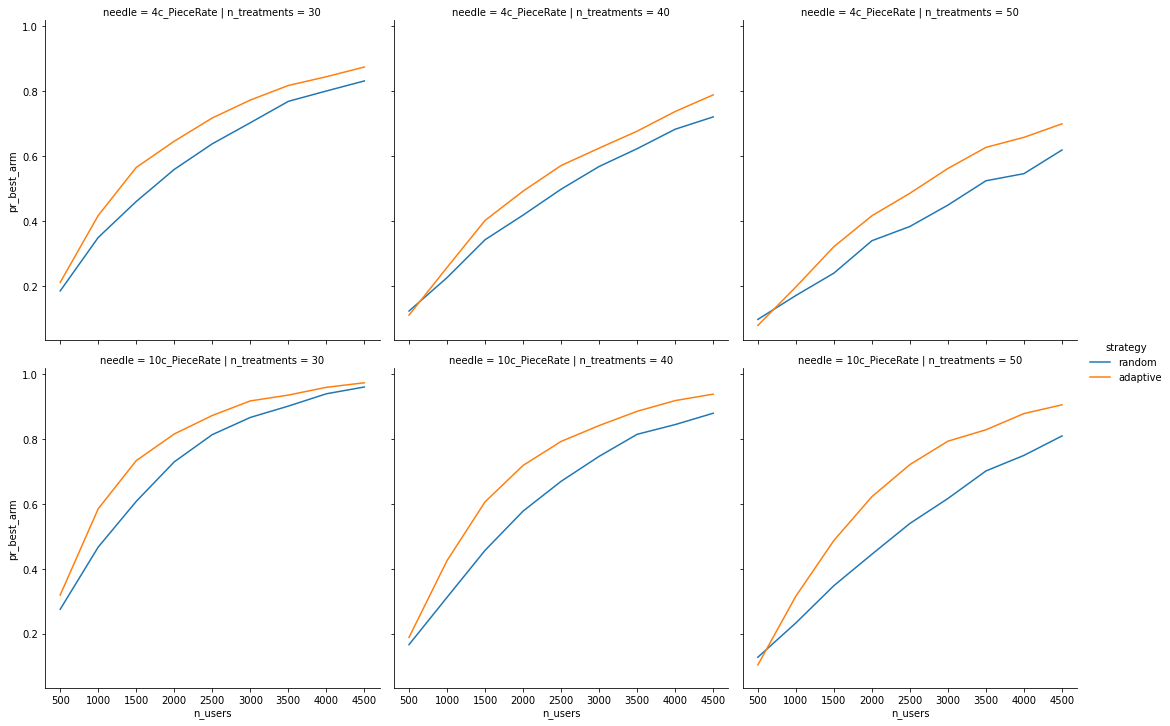

In [5]:
sns.relplot(
    data=df,
    x="n_users",
    y="pr_best_arm",
    hue="strategy",
    col="n_treatments",
    row="needle",
    kind="line",
    ci=None
)
plt.savefig(os.path.join(PLOT_DIR, "pr_best_arm.png"))
plt.show()

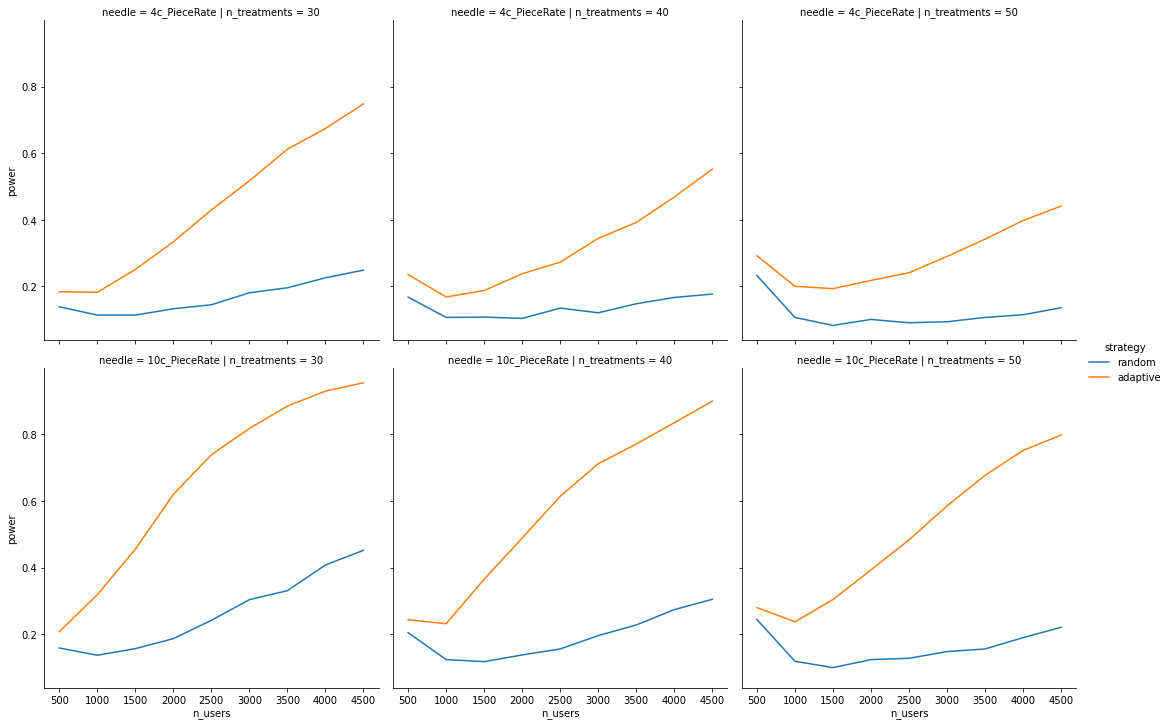

In [13]:
sns.relplot(
    data=df,
    x="n_users",
    y="power",
    hue="strategy",
    col="n_treatments",
    row="needle",
    kind="line",
    ci=None
)
plt.savefig(os.path.join(PLOT_DIR, "power.png"))
plt.show()

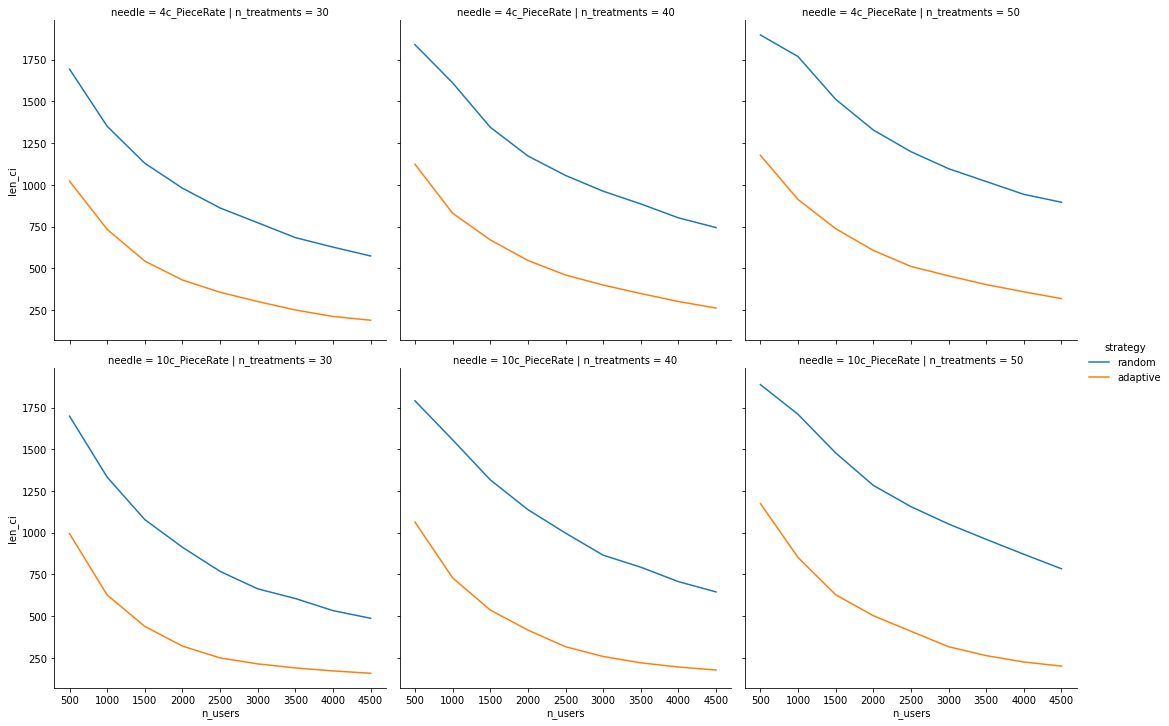

In [7]:
sns.relplot(
    data=df,
    x="n_users",
    y="len_ci",
    hue="strategy",
    col="n_treatments",
    row="needle",
    kind="line",
    estimator=lambda x: np.quantile(x, .5),
    ci=None
)
plt.savefig(os.path.join(PLOT_DIR, "len_ci.png"))
plt.show()